# The Discrete Fourier Transform


#### Import libraries. Run the cell below!

In [2]:
# Run this first!!
from IPython.display import Audio
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib notebook

#### The text file "file.txt" contains sampled values from a recording of a note played on the piano at the rate of 44100 Hz.

#### Load the data into an array and play the audio.
```python
ys = np.loadtxt(filename)
```

In [3]:
ys = np.loadtxt("file.txt")

#### Create an Audio object and then play it.
```python
Audio(ys, rate=fs)
```
#### where ys is the sampled values and fs is the sampling frequency. 

In [5]:
Audio(ys, rate=44100)


#### Now use `np.fft.fft(samples)` to convert the samples to Fourier coefficients and store the result in the variable `yk`. (Since `ys` contains 100000 samples, we expect `yk` to contain N = 100000 Fourier coefficients.) 

#### Use np.arange(N) to create an array of integers $k=0,1,2,...,N-1$. Store in variable `k`. Then create the array of frequencies(harmonics) $f_k$ that the DFT will detect. $f_k=kf_1=k/L$ where $k = 0,1,2...,N-1$. (The array `fk` contains 100000 frequencies. These are the frequencies that the DFT can detect.)


In [43]:
N = ys.size
fs = 44100
L = N/fs
yk = np.fft.fft(ys)
k = np.arange(N)
fk = k/L


In [45]:
fk[:]

array([0.0000000e+00, 4.4100000e-01, 8.8200000e-01, ..., 4.4098677e+04,
       4.4099118e+04, 4.4099559e+04])

#### Use `fk[:10]` to print out the first 10 harmonics that the DFT will detect. What is the fundamental frequency?

### Answer: 0.441 Hz.

In [9]:
fk[:10]

array([0.   , 0.441, 0.882, 1.323, 1.764, 2.205, 2.646, 3.087, 3.528,
       3.969])

#### Now plot the frequency domain representation (frequencies $f_k$ vs magnitude of Fourier coefficients). Use `np.abs(yk)` to compute magnitudes of the Fourier coefficients.

#### What note did the piano play? What are the harmonics? You may use the interactive feature of the matplotlib graph to estimate these values. Use `ax.set_xlim(0, 4000)` to zoom in to the first 4000 Hz.

####  The following website of notes/frequencies will be helpful. 
http://pages.mtu.edu/~suits/notefreqs.html

(0, 4000)

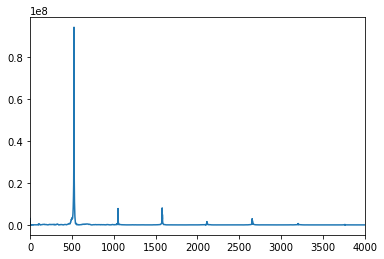

In [47]:
fig, ax = plt.subplots()
ax.plot(fk, np.abs(yk))
ax.set_xlim(0,4000)

### Answer: By looking at the graph above, approximately a little over 500 Hz, a C5. Later in this problem set, we can compute this exactly.

#### The function `plot_signal_time` is from the previous lab. Run it. You may use it later in this lab.

In [11]:
def plot_signal_time(ys, t1, t2, fs = 44100):
    """ plots the signal ys on the time domain [t2, t2] 
    at the sampling rate fs. 
    """
    N = ys.size # num of samples
    L = N/fs # duration of audio clip
    ts = np.linspace(0,L,N) # array of N equally spaced values from [0,L]
    fig, ax = plt.subplots()
    ax.plot(ts, ys)
    ax.set_xlim(t1, t2)
    ax.set_xlabel("Time(in seconds)")


#### Write the function `plot_signal_frequency` to plot the spectrum of the signal. This code is similar to the code from the function `plot_signal_time` above. 

In [28]:
def plot_signal_frequency(ys, f1, f2, fs = 44100):
    """ plots the signal ys on the frequency domain [f1, f2] 
    at the sampling rate fs. 
    """
    N = ys.size
    L = N/fs
    yk = np.fft.fft(ys)
    k = np.arange(N) # 0 to N-1
    freqs = k/L
    fig, ax = plt.subplots()
    ax.plot(freqs, np.abs(yk))
    ax.set_xlim(f1,f2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|yk|")
    

#### Run the cell above. Then call the function `plot_signal_frequency` to plot the waveform of the piano. Zoom in. 

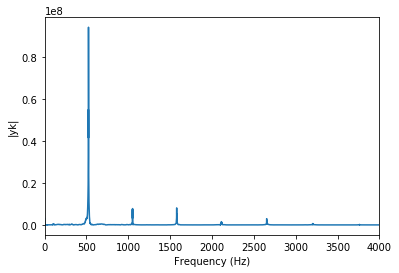

In [19]:
plot_signal_frequency(ys,0,4000)

#### Import `trumpet.txt`. This is sampled at 44100 Hz. Compute the new length L1 and new frequencies fk1. Create an Audio object and listen to the audio. 


In [39]:
ys1 = np.loadtxt("trumpet.txt")
L1 = ys1.size/44100
fk1 = np.arange(ys1.size)/L1
print(ys1.size)
fk1[1]

100000


0.441

In [30]:
Audio(ys1, rate = 44100)

#### Use `plot_signal_frequency` above to plot the magnitudes of the Fourier coefficients. Compare this frequency domain of the trumpet to that of the piano. 


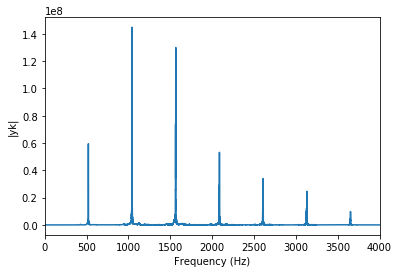

In [31]:
yk1 = np.fft.fft(ys1)
plot_signal_frequency(ys1,0,4000)

#### We used the interactive feature of matplotlib to estimate the fundamental frequency and its harmonics. Now use Python code to find the fundamental frequency exactly of the PIANO recording. Hint: Compute the Fourier coefficients. Use `np.argsort(array)` to sort an array. This function returns the indices that would sort the array. The formula $f_k=k/L$ will be useful. 

In [32]:
N = ys.size
yk = np.fft.fft(ys)
np.argsort(np.abs(yk))

array([65645, 34355, 64600, ...,  1188, 98810,  1190])

In [33]:
1190/L 

524.79

### Thus, the piano recording is a C5 = 524 Hz.

#### Find the most dominant(largest Fourier coefficient magnitude) frequency in the TRUMPET recording. 

In [34]:
np.argsort(np.abs(yk1))

array([48391, 51609, 48346, ...,  3551, 97633,  2367])

In [35]:
2367/L

1043.847

#### Find the fundamental frequency in the TRUMPET recording. 

### Note that 1043 Hz is the most dominant but not the fundamental frequency of the trumpet sound.

### Use slicing to only consider frequencies less than 1043 Hz and sort this sublist.

In [41]:
fk1[1183]

521.703

In [43]:
np.argsort(np.abs(yk[:2000]))

array([   8,   50,   53, ..., 1182, 1184, 1183])

In [44]:
1183/L

521.703

### The fundamental frequency is thus also a C5 the same as the piano recording.